This notebook is focused on doing some initial exploratory analysis of the corpus.

In [1]:
#import modules for working with text
import pandas as pd
import nltk
nltk.download('punkt') 
import csv
from nltk.probability import FreqDist
import re
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jakeb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#plotting modules
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

In [3]:
#open the pickled corpus dataframe (with the tokenized words)
df = pd.read_pickle('corpus_2.pkl')#this should have been generated by the previous notebook (2.DataCleaning.ipynb). Make sure the pkl file is in the same folder you are running this notebook.
df

,Filename,Type,Date,Volume,Issue,Pages,OCR batch,Text,OCR filename,tokenized_words
0,CWSupp007.pdf,Christian Workers’ Supplement,1891-07,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE,\n\nChristian Workers...",CWSupp007.pdf.tiff.txt,"[polytechnic, magazine, christian, workers, re..."
1,CWSupp008.pdf,Christian Workers’ Supplement,1891-09,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street,\...",CWSupp008.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ..."
2,CWSupp009.pdf,Christian Workers’ Supplement,1891-10,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE,\n\nChristian Workers...",CWSupp009.pdf.tiff.txt,"[polytechnic, magazine, christian, workers, re..."
3,CWSupp010.pdf,Christian Workers’ Supplement,1891-11,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street, ...",CWSupp010.pdf.tiff.txt,"[polytechnic, magazine, regent, street, w, chr..."
4,CWSupp011.pdf,Christian Workers’ Supplement,1891-12,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street, ...",CWSupp011.pdf.tiff.txt,"[polytechnic, magazine, regent, street, w, chr..."
...,...,...,...,...,...,...,...,...,...,...
1720,Quintinian005.pdf,Quintinian,1892-08,NaN,5,6,12,"Supplement to Podytechnte Magiesine,\n\nAugust...",Quintinian005.pdf.tiff.txt,"[supplement, podytechnte, magiesine, august, p..."
1721,Quintinian006.pdf,Quintinian,1892-09,NaN,6,2,12,"Supplement to Polytechnic Magazine, September ...",Quintinian006.pdf.tiff.txt,"[supplement, polytechnic, magazine, september,..."
1722,Quintinian007.pdf,Quintinian,1892-10,NaN,7,8,12,"[Supplement to Polytechnic Magazine, October 6...",Quintinian007.pdf.tiff.txt,"[ctober, october, opening, new, polytechnic, s..."
1723,Quintinian008.pdf,Quintinian,1892-11,NaN,8,8,12,"{Supplement to Polytechute Magazine, November ...",Quintinian008.pdf.tiff.txt,"[supplement, polytechute, magazine, november, ..."


In [4]:
#do the frequency analysis again, just the top 100 words this time

#extract words from tokenized_words
words = []
for word in (df['tokenized_words']):
    words.append(word)

#but the above gives us a list of lists, so we need to extract the words from that
allWords = []
for wordList in words:
    allWords += wordList

#to do the frequency analysis    
fdist = FreqDist(allWords)
print(fdist.most_common(100))

[('w', 121254), ('h', 103131), ('members', 101688), ('one', 92436), ('c', 88852), ('e', 87644), ('first', 72123), ('poly', 71145), ('b', 69841), ('club', 69318), ('g', 68030), ('pass', 65181), ('f', 61833), ('us', 61005), ('time', 59720), ('polytechnic', 58105), ('last', 56029), ('good', 54934), ('may', 53833), ('r', 51874), ('class', 50262), ('would', 49004), ('two', 48107), ('miss', 45325), ('saturday', 43369), ('well', 42985), ('great', 41842), ('year', 41590), ('v', 40807), ('new', 40420), ('work', 40360), ('next', 40102), ('old', 38647), ('meeting', 37847), ('evening', 37704), ('many', 36829), ('made', 36732), ('day', 36010), ('ist', 35944), ('also', 35697), ('hall', 34941), ('sec', 33909), ('l', 33808), ('society', 33204), ('place', 33189), ('second', 33026), ('held', 32596), ('team', 31933), ('institute', 31501), ('magazine', 30809), ('london', 29323), ('p', 29003), ('room', 28915), ('home', 28911), ('see', 28903), ('street', 28604), ('school', 28341), ('men', 28181), ('much', 2

In [5]:
#Looks good, but do need to decide what to do about the individual letters though. On the one hand, they are probably initials which do have some meaning,
#  on the other hand they aren't meaningful by themselves...

In [5]:
#Decided to get rid of all single letter tokens
df['tokenized_words'] = df['tokenized_words'].apply(lambda x: [item for item in x if len(item) > 2])



In [6]:
#do the frequency analysis again, checking to see that it only include works with a length greater than two

#extract words from tokenized_words
words = []
for word in (df['tokenized_words']):
    words.append(word)

#but the above gives us a list of lists, so we need to extract the words from that
allWords = []
for wordList in words:
    allWords += wordList

#to do the frequency analysis    
fdist = FreqDist(allWords)
print(fdist.most_common(100))

[('members', 101688), ('one', 92436), ('first', 72123), ('poly', 71145), ('club', 69318), ('pass', 65181), ('time', 59720), ('polytechnic', 58105), ('last', 56029), ('good', 54934), ('may', 53833), ('class', 50262), ('would', 49004), ('two', 48107), ('miss', 45325), ('saturday', 43369), ('well', 42985), ('great', 41842), ('year', 41590), ('new', 40420), ('work', 40360), ('next', 40102), ('old', 38647), ('meeting', 37847), ('evening', 37704), ('many', 36829), ('made', 36732), ('day', 36010), ('ist', 35944), ('also', 35697), ('hall', 34941), ('sec', 33909), ('society', 33204), ('place', 33189), ('second', 33026), ('held', 32596), ('team', 31933), ('institute', 31501), ('magazine', 30809), ('london', 29323), ('room', 28915), ('home', 28911), ('see', 28903), ('street', 28604), ('school', 28341), ('men', 28181), ('much', 27868), ('man', 27779), ('every', 26879), ('must', 26147), ('years', 26017), ('shall', 25898), ('three', 25463), ('present', 24860), ('take', 24473), ('season', 24447), ('l

In [7]:
print(df.loc[1, 'tokenized_words']) #- just double-checking checking we haven't removed duplicates from tokenized works


['polytechnic', 'magazine', 'regent', 'street', 'christian', 'workers', 'supplement', 'september', 'one', 'penny', 'warchworb', 'good', 'courage', 'lord', 'strength', 'aimforward', 'institute', 'christ', 'waapside', 'hotes', 'motto', 'month', 'motive', 'love', 'christ', 'constraineth', 'cor', 'lord', 'seeth', 'man', 'seeth', 'man', 'looketh', 'outward', 'appearance', 'lord', 'looketh', 'heart', 'sam', 'thou', 'thou', 'fasteth', 'anoint', 'thine', 'head', 'wash', 'thy', 'face', 'thou', 'appear', 'unto', 'men', 'fast', 'unto', 'thy', 'father', 'secret', 'thy', 'father', 'seeth', 'secret', 'shall', 'reward', 'thee', 'openly', 'matt', 'light', 'body', 'eye', 'therefore', 'thine', 'eye', 'single', 'thy', 'whole', 'body', 'shall', 'full', 'light', 'matt', 'good', 'tree', 'bring', 'forth', 'evil', 'fruit', 'neither', 'corrupt', 'tree', 'bring', 'forth', 'good', 'fruit', 'wherefore', 'fruits', 'shall', 'know', 'every', 'one', 'saith', 'unto', 'lord', 'lord', 'shall', 'enter', 'kingdom', 'heave

In [8]:
#I want to see how many words there are in each issue
for words in (df.tokenized_words):
    print(len(words))

#wonder why the 5th one is longer?
#df.head(10) shows that this has more pages, might be something interesting to look at


3121
3111
3135
2957
2930
13326
8608
13542
11211
7362
11819
11405
8374
8639
8504
20077
7605
8021
9863
10784
8614
7686
8614
8380
7047
6038
9976
3962
7367
8550
5905
5522
8780
7158
8016
12571
8948
8606
7557
19060
8280
14889
7629
9864
9898
8065
15663
9093
14287
8668
8667
19552
13424
13103
14177
11229
12031
9457
17334
12902
14935
9048
18243
15926
15816
15956
24583
17128
12761
13891
7890
7542
8550
8604
9372
8859
9236
9824
9618
8793
9791
12180
9316
8844
9542
9687
9487
9216
9446
9099
9281
8669
8685
8874
9170
11545
9147
9054
8959
9399
8512
10981
8491
8577
9314
8276
11321
8905
9485
6372
8552
8853
9339
8405
8744
9896
9343
10777
9082
9302
9081
9366
8362
8686
12271
11358
11727
13511
14687
14221
17137
14244
13377
12702
15110
9678
8874
10944
10924
12928
13483
14563
15423
14091
14868
13326
14865
12259
12774
12987
13066
11072
7945
9405
12042
10611
10671
8921
8224
8470
8951
8542
8295
8257
8088
9036
9182
8832
8720
8968
10642
9422
8363
9177
9011
8697
9056
8177
4712
4362
4350
4352
4612
4367
4223
4542
4717
7

In [9]:
#Need to make a list of the above wordcounts so I can add it as a column in the dataframe
list_of_lengths = []
for words in (df.tokenized_words):
    list_of_lengths.append(len(words))

df['Wordcount_tokens'] = list_of_lengths

In [10]:
#better make it clear that the wordcount is of the tokenized words
#df.rename(columns={'Wordcount':'Wordcount_tokens'},inplace=True) [commented this out as I have corrected above instead]

In [11]:
#check wordcount looks ok
df.head(10)

,Filename,Type,Date,Volume,Issue,Pages,OCR batch,Text,OCR filename,tokenized_words,Wordcount_tokens
0,CWSupp007.pdf,Christian Workers’ Supplement,1891-07,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE,\n\nChristian Workers...",CWSupp007.pdf.tiff.txt,"[polytechnic, magazine, christian, workers, re...",3121
1,CWSupp008.pdf,Christian Workers’ Supplement,1891-09,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street,\...",CWSupp008.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",3111
2,CWSupp009.pdf,Christian Workers’ Supplement,1891-10,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE,\n\nChristian Workers...",CWSupp009.pdf.tiff.txt,"[polytechnic, magazine, christian, workers, re...",3135
3,CWSupp010.pdf,Christian Workers’ Supplement,1891-11,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street, ...",CWSupp010.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",2957
4,CWSupp011.pdf,Christian Workers’ Supplement,1891-12,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street, ...",CWSupp011.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",2930
5,CWSupp012.pdf,Christian Workers’ Supplement,1892-01,NaN,NaN,18,1,"THE POLYTECHNIC MAGAZINE, 809, Regent\n\nNo. 1...",CWSupp012.pdf.tiff.txt,"[polytechnic, magazine, regent, warcuworn, goo...",13326
6,HolidayGuide.pdf,Holiday Guide,1891-05-29,NaN,NaN,24,1,THE POLYTEGHNIG HOLIDAY CUIDE.\n\nBEING AN EXT...,HolidayGuide.pdf.tiff.txt,"[polyteghnig, holiday, cuide, extra, number, p...",8608
7,HT0010001.pdf,Home Tidings,1879-06,1.0,1,28,1,HOME\n\nPUBLISHED\n\nTIDINGS\n\nNEWS.\n\nMONTH...,HT0010001.pdf.tiff.txt,"[home, published, tidings, news, monthly, vout...",13542
8,HT0010002.pdf,Home Tidings,1879-07,1.0,2,24,1,"PUBLISHED\n\n \n\nTIDINGS\n\nMONTHLY,\n\n \n\n...",HT0010002.pdf.tiff.txt,"[published, tidings, monthly, ilno, price, ins...",11211
9,HT0010003.pdf,Home Tidings,1879-07,1.0,3,16,1,HOME\n\nPUBLISHED\n\n \n\nTIDINGS\n\nMONTHLY.\...,HT0010003.pdf.tiff.txt,"[home, published, tidings, monthly, july, pric...",7362


In [3]:
#Might be interesting to look at pages vs number of words. Expect there would be a basic relationship there



C:\Users\jakeb\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


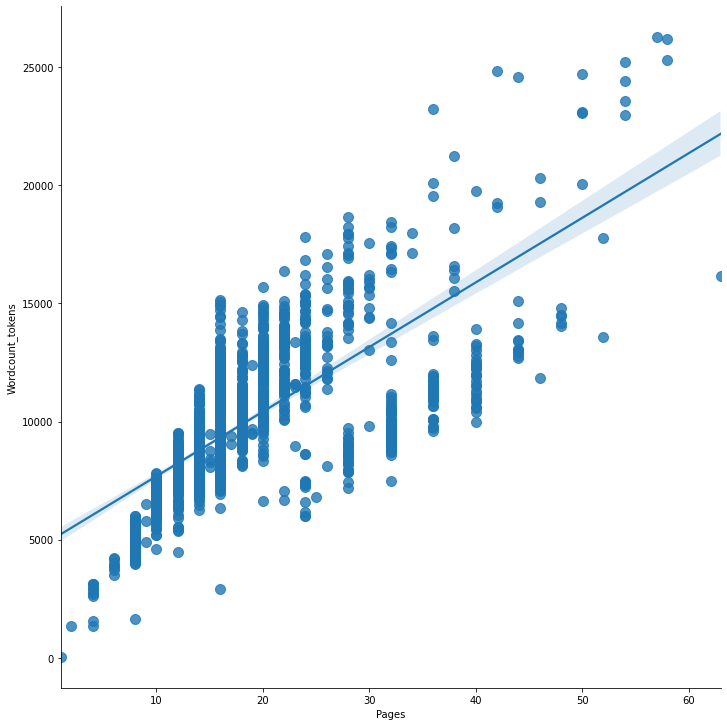

In [12]:
#Not surprisingly the more pages, the more words! At least it means I probably haven't messed up the word counts column
sns.lmplot(x='Pages', y='Wordcount_tokens', data=df, size=10, scatter_kws={"s": 100})

In [13]:
#Perhaps we could also add the most frequent words per issue

#create empty list to add the word frequencies to
MostFreq = []
for word in (df['tokenized_words']):#loop through the df
    fdist = FreqDist(word)
    MostFreq.append(fdist.most_common(30))#add thirty most frequent terms to list

In [14]:
df['Frequent_tokens'] = MostFreq #add list of freq words to dataframe

In [15]:
df.head(20)#check df

,Filename,Type,Date,Volume,Issue,Pages,OCR batch,Text,OCR filename,tokenized_words,Wordcount_tokens,Frequent_tokens
0,CWSupp007.pdf,Christian Workers’ Supplement,1891-07,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE,\n\nChristian Workers...",CWSupp007.pdf.tiff.txt,"[polytechnic, magazine, christian, workers, re...",3121,"[(love, 57), (god, 31), (one, 28), (may, 25), ..."
1,CWSupp008.pdf,Christian Workers’ Supplement,1891-09,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street,\...",CWSupp008.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",3111,"[(god, 36), (may, 31), (one, 26), (christ, 25)..."
2,CWSupp009.pdf,Christian Workers’ Supplement,1891-10,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE,\n\nChristian Workers...",CWSupp009.pdf.tiff.txt,"[polytechnic, magazine, christian, workers, re...",3135,"[(work, 52), (one, 49), (many, 27), (may, 24),..."
3,CWSupp010.pdf,Christian Workers’ Supplement,1891-11,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street, ...",CWSupp010.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",2957,"[(christ, 39), (god, 33), (work, 33), (may, 29..."
4,CWSupp011.pdf,Christian Workers’ Supplement,1891-12,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street, ...",CWSupp011.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",2930,"[(hope, 49), (one, 39), (christ, 37), (god, 25..."
5,CWSupp012.pdf,Christian Workers’ Supplement,1892-01,NaN,NaN,18,1,"THE POLYTECHNIC MAGAZINE, 809, Regent\n\nNo. 1...",CWSupp012.pdf.tiff.txt,"[polytechnic, magazine, regent, warcuworn, goo...",13326,"[(work, 140), (one, 104), (may, 85), (god, 80)..."
6,HolidayGuide.pdf,Holiday Guide,1891-05-29,NaN,NaN,24,1,THE POLYTEGHNIG HOLIDAY CUIDE.\n\nBEING AN EXT...,HolidayGuide.pdf.tiff.txt,"[polyteghnig, holiday, cuide, extra, number, p...",8608,"[(polytechnic, 86), (may, 60), (one, 58), (hol..."
7,HT0010001.pdf,Home Tidings,1879-06,1.0,1,28,1,HOME\n\nPUBLISHED\n\nTIDINGS\n\nNEWS.\n\nMONTH...,HT0010001.pdf.tiff.txt,"[home, published, tidings, news, monthly, vout...",13542,"[(god, 95), (one, 87), (would, 84), (abram, 80..."
8,HT0010002.pdf,Home Tidings,1879-07,1.0,2,24,1,"PUBLISHED\n\n \n\nTIDINGS\n\nMONTHLY,\n\n \n\n...",HT0010002.pdf.tiff.txt,"[published, tidings, monthly, ilno, price, ins...",11211,"[(street, 151), (april, 86), (one, 80), (long,..."
9,HT0010003.pdf,Home Tidings,1879-07,1.0,3,16,1,HOME\n\nPUBLISHED\n\n \n\nTIDINGS\n\nMONTHLY.\...,HT0010003.pdf.tiff.txt,"[home, published, tidings, monthly, july, pric...",7362,"[(may, 54), (one, 41), (give, 40), (street, 36..."


In [ ]:
#STOPPING FOR THE DAY SO I'M GOING TO PICKLE THE DF
df.to_pickle("corpus_3.pkl")

In [4]:
#read the pickled df
df = pd.read_pickle('corpus_3.pkl')
df

,Filename,Type,Date,Volume,Issue,Pages,OCR batch,Text,OCR filename,tokenized_words,Wordcount_tokens,Frequent_tokens
0,CWSupp007.pdf,Christian Workers’ Supplement,1891-07,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE,\n\nChristian Workers...",CWSupp007.pdf.tiff.txt,"[polytechnic, magazine, christian, workers, re...",3121,"[(love, 57), (god, 31), (one, 28), (may, 25), ..."
1,CWSupp008.pdf,Christian Workers’ Supplement,1891-09,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street,\...",CWSupp008.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",3111,"[(god, 36), (may, 31), (one, 26), (christ, 25)..."
2,CWSupp009.pdf,Christian Workers’ Supplement,1891-10,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE,\n\nChristian Workers...",CWSupp009.pdf.tiff.txt,"[polytechnic, magazine, christian, workers, re...",3135,"[(work, 52), (one, 49), (many, 27), (may, 24),..."
3,CWSupp010.pdf,Christian Workers’ Supplement,1891-11,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street, ...",CWSupp010.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",2957,"[(christ, 39), (god, 33), (work, 33), (may, 29..."
4,CWSupp011.pdf,Christian Workers’ Supplement,1891-12,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street, ...",CWSupp011.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",2930,"[(hope, 49), (one, 39), (christ, 37), (god, 25..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,Quintinian005.pdf,Quintinian,1892-08,NaN,5,6,12,"Supplement to Podytechnte Magiesine,\n\nAugust...",Quintinian005.pdf.tiff.txt,"[supplement, podytechnte, magiesine, august, p...",3874,"[(prize, 67), (yards, 55), (july, 53), (french..."
1721,Quintinian006.pdf,Quintinian,1892-09,NaN,6,2,12,"Supplement to Polytechnic Magazine, September ...",Quintinian006.pdf.tiff.txt,"[supplement, polytechnic, magazine, september,...",1358,"[(august, 49), (month, 11), (meeting, 11), (so..."
1722,Quintinian007.pdf,Quintinian,1892-10,NaN,7,8,12,"[Supplement to Polytechnic Magazine, October 6...",Quintinian007.pdf.tiff.txt,"[ctober, october, opening, new, polytechnic, s...",5384,"[(old, 47), (college, 33), (work, 32), (poly, ..."
1723,Quintinian008.pdf,Quintinian,1892-11,NaN,8,8,12,"{Supplement to Polytechute Magazine, November ...",Quintinian008.pdf.tiff.txt,"[supplement, polytechute, magazine, november, ...",5294,"[(one, 49), (club, 34), (members, 33), (old, 2..."


In [16]:
#I'd like to look at change over time, so need to look at the Date column
#none of the date columns seem to be empty, which is great, but I think some dates are missing anyway
print(df['Date'].isnull().sum())

0


In [18]:
df.loc[df['Date']== 'n.d.']

,Filename,Type,Date,Volume,Issue,Pages,OCR batch,Text,OCR filename,tokenized_words,Wordcount_tokens,Frequent_tokens
877,HT0360872a.pdf,Polytechnic Magazine,n.d.,36.0,872a,1,6,SUPPLEMENT TO “THE POLYTECHNIC MAGAZINE” WeEpb...,HT0360872a.pdf.tiff.txt,"[supplement, polytechnic, magazine, weepbdnesd...",39,"[(school, 4), (polytechnic, 2), (may, 2), (pro..."


In [19]:
#create new dataset dropping the item with no date
df_withdate = df.drop([877])
df_withdate

,Filename,Type,Date,Volume,Issue,Pages,OCR batch,Text,OCR filename,tokenized_words,Wordcount_tokens,Frequent_tokens
0,CWSupp007.pdf,Christian Workers’ Supplement,1891-07,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE,\n\nChristian Workers...",CWSupp007.pdf.tiff.txt,"[polytechnic, magazine, christian, workers, re...",3121,"[(love, 57), (god, 31), (one, 28), (may, 25), ..."
1,CWSupp008.pdf,Christian Workers’ Supplement,1891-09,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street,\...",CWSupp008.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",3111,"[(god, 36), (may, 31), (one, 26), (christ, 25)..."
2,CWSupp009.pdf,Christian Workers’ Supplement,1891-10,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE,\n\nChristian Workers...",CWSupp009.pdf.tiff.txt,"[polytechnic, magazine, christian, workers, re...",3135,"[(work, 52), (one, 49), (many, 27), (may, 24),..."
3,CWSupp010.pdf,Christian Workers’ Supplement,1891-11,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street, ...",CWSupp010.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",2957,"[(christ, 39), (god, 33), (work, 33), (may, 29..."
4,CWSupp011.pdf,Christian Workers’ Supplement,1891-12,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street, ...",CWSupp011.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",2930,"[(hope, 49), (one, 39), (christ, 37), (god, 25..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,Quintinian005.pdf,Quintinian,1892-08,NaN,5,6,12,"Supplement to Podytechnte Magiesine,\n\nAugust...",Quintinian005.pdf.tiff.txt,"[supplement, podytechnte, magiesine, august, p...",3874,"[(prize, 67), (yards, 55), (july, 53), (french..."
1721,Quintinian006.pdf,Quintinian,1892-09,NaN,6,2,12,"Supplement to Polytechnic Magazine, September ...",Quintinian006.pdf.tiff.txt,"[supplement, polytechnic, magazine, september,...",1358,"[(august, 49), (month, 11), (meeting, 11), (so..."
1722,Quintinian007.pdf,Quintinian,1892-10,NaN,7,8,12,"[Supplement to Polytechnic Magazine, October 6...",Quintinian007.pdf.tiff.txt,"[ctober, october, opening, new, polytechnic, s...",5384,"[(old, 47), (college, 33), (work, 32), (poly, ..."
1723,Quintinian008.pdf,Quintinian,1892-11,NaN,8,8,12,"{Supplement to Polytechute Magazine, November ...",Quintinian008.pdf.tiff.txt,"[supplement, polytechute, magazine, november, ...",5294,"[(one, 49), (club, 34), (members, 33), (old, 2..."


In [20]:

df_withdate['Date'] = pd.to_datetime(df_withdate['Date']) #convert Date to datestamp
df_dateindex = df_withdate.set_index('Date') #create new df with date as index


<AxesSubplot:xlabel='Date'>

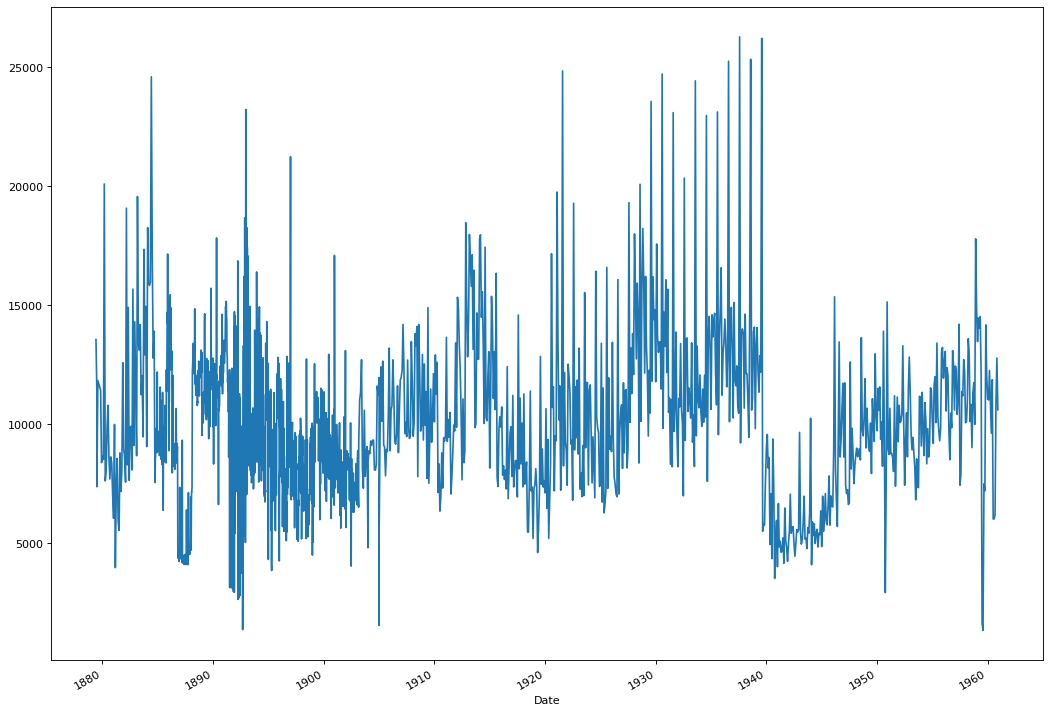

In [21]:
figure(figsize=(16, 12), dpi=80)
df_dateindex['Wordcount_tokens'].plot() #number of words by date

<AxesSubplot:xlabel='Date'>

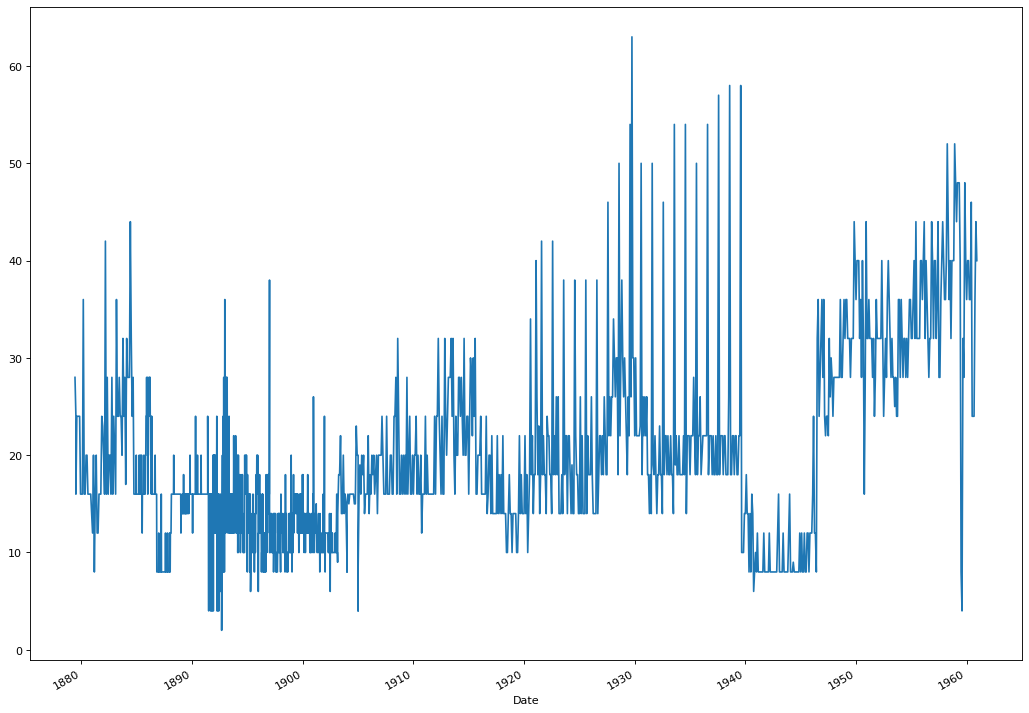

In [22]:
figure(figsize=(16, 12), dpi=80)
df_dateindex['Pages'].plot() #number of pages

In [23]:
#what about the density of the text, i.e. words per page
wordsPerPage = df_dateindex['Wordcount_tokens'] / df_dateindex['Pages']
print (wordsPerPage[:5]) #checking it looks ok
df_dateindex['Words_per_page'] = wordsPerPage

Date
1891-07-01    780.25
1891-09-01    777.75
1891-10-01    783.75
1891-11-01    739.25
1891-12-01    732.50
dtype: float64


In [24]:
df_dateindex

,Filename,Type,Volume,Issue,Pages,OCR batch,Text,OCR filename,tokenized_words,Wordcount_tokens,Frequent_tokens,Words_per_page
Date,,,,,,,,,,,,
1891-07-01,CWSupp007.pdf,Christian Workers’ Supplement,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE,\n\nChristian Workers...",CWSupp007.pdf.tiff.txt,"[polytechnic, magazine, christian, workers, re...",3121,"[(love, 57), (god, 31), (one, 28), (may, 25), ...",780.250000
1891-09-01,CWSupp008.pdf,Christian Workers’ Supplement,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street,\...",CWSupp008.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",3111,"[(god, 36), (may, 31), (one, 26), (christ, 25)...",777.750000
1891-10-01,CWSupp009.pdf,Christian Workers’ Supplement,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE,\n\nChristian Workers...",CWSupp009.pdf.tiff.txt,"[polytechnic, magazine, christian, workers, re...",3135,"[(work, 52), (one, 49), (many, 27), (may, 24),...",783.750000
1891-11-01,CWSupp010.pdf,Christian Workers’ Supplement,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street, ...",CWSupp010.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",2957,"[(christ, 39), (god, 33), (work, 33), (may, 29...",739.250000
1891-12-01,CWSupp011.pdf,Christian Workers’ Supplement,NaN,NaN,4,1,"THE POLYTECHNIC MAGAZINE, 809, Regent Street, ...",CWSupp011.pdf.tiff.txt,"[polytechnic, magazine, regent, street, christ...",2930,"[(hope, 49), (one, 39), (christ, 37), (god, 25...",732.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
1892-08-01,Quintinian005.pdf,Quintinian,NaN,5,6,12,"Supplement to Podytechnte Magiesine,\n\nAugust...",Quintinian005.pdf.tiff.txt,"[supplement, podytechnte, magiesine, august, p...",3874,"[(prize, 67), (yards, 55), (july, 53), (french...",645.666667
1892-09-01,Quintinian006.pdf,Quintinian,NaN,6,2,12,"Supplement to Polytechnic Magazine, September ...",Quintinian006.pdf.tiff.txt,"[supplement, polytechnic, magazine, september,...",1358,"[(august, 49), (month, 11), (meeting, 11), (so...",679.000000
1892-10-01,Quintinian007.pdf,Quintinian,NaN,7,8,12,"[Supplement to Polytechnic Magazine, October 6...",Quintinian007.pdf.tiff.txt,"[ctober, october, opening, new, polytechnic, s...",5384,"[(old, 47), (college, 33), (work, 32), (poly, ...",673.000000


<AxesSubplot:xlabel='Date'>

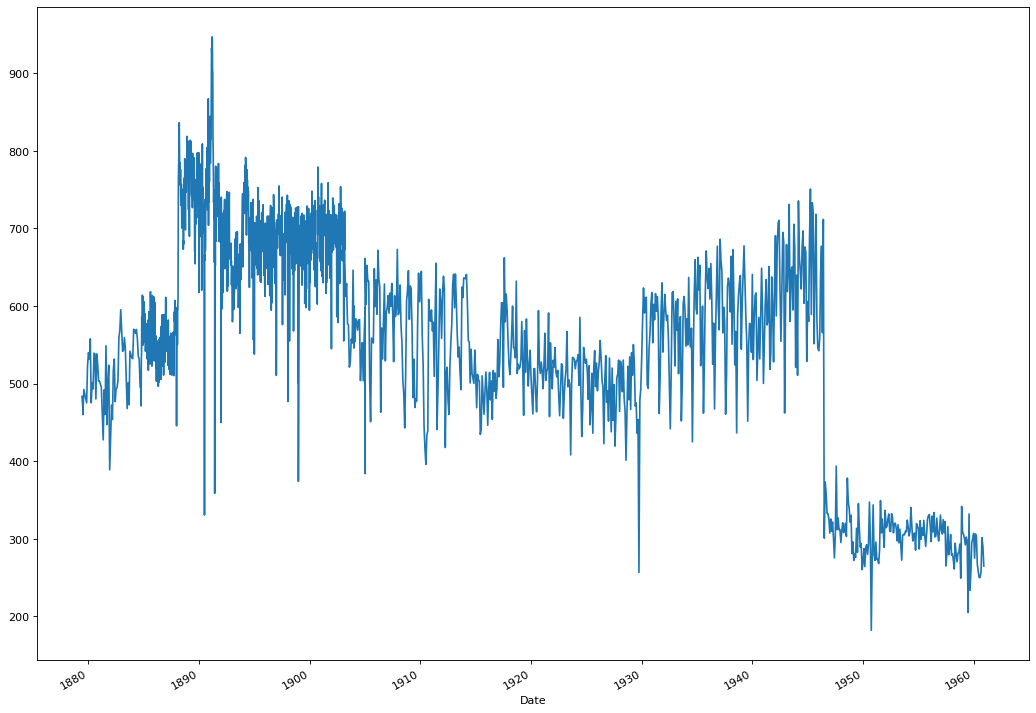

In [25]:
figure(figsize=(16, 12), dpi=80)
df_dateindex['Words_per_page'].plot() #words per page

#Dispersion plots (using unfiltered text)

In [ ]:
#I want to do a dispersion plot diagram using whole text

#keyword = input('Enter a keyword: ')

#whole_text = []
#for word in (df_dateindex['Text']):
#    whole_text.append(word)

#had to cancel this after c20,000 seconds - must be a better way to do it

#ok did the below after a lot of trial and error - see #notes here https://colab.research.google.com/drive/1AqlJVvWpwDEMOQHuObaCFU7KLGyycK-H?usp=sharing

In [ ]:
#turns out you can easily convert column to list without iterating
all_text = df_dateindex['Text'].tolist()
counter = 0

#let's have a look at it
for word in all_text:
    print (word)
    counter = counter + 1
    if counter == 5:
        break

#(df_dateindex['Text']).disperion_plot(['God'])

THE POLYTECHNIC MAGAZINE,

Christian Workers’

809, Regent Street, W.,

Supplement.

 

 

 

 

JULY, 1891.

ONE PENNY.

 

 

 

 

 

WATCHWORD.-—~“‘ Be of good courage.” ‘The Lord is our strength.”
AiM.—forward! Our Institute for Christ.

Wayside Hotes.

MOTTO FOR THE MontH.—*“ LOVE.”

“ God is Love.”——1 John, iv. 16.

“God so loved the world that He gave His only begotten
Son, that whosoever believeth in Him should not perish but
have Everlasting Life.”—John iii., 16.

“We love Him because He first loved us.”—-1 John iv., 19.

Jesus said “If ye love Me, keep My Commandments.”—
John xiv., 15.

“Thou shalt love the Lord thy God with all thy heart, and
with all thy soul, and with all thy mind, and with all thy
strength ; this is the first commandment. And the second is like,
namely, this, Thou shalt love thy neighbour as thyself.”—Mark
xil., 30, 31.

3 Let us love one another, for love is of God.”—1 John iy., 7.

“Let us consider one another to provoke unto love and
good works.”—Heb.

In [ ]:
len(all_text) # ok so above has given us the text of all the issues as a list (1724 issues

1724

In [ ]:
import itertools

lists = [all_text]
all_text_combined = list(itertools.chain.from_iterable(lists))#trying to merge into one string of text

In [ ]:
len(all_text)
#still looks too short (i.e. one item per issue)

1724

In [ ]:
all_text_string = ''.join(all_text)#let's join it into one string

In [ ]:
#need to tokenize before turning into nltk object - raises question of whether we should just use the cleaned & tokenized text? But that wouldn't make sense for collocations I suppose
tokens = nltk.word_tokenize(all_text_string)

In [ ]:
#have a quick look at it
counter = 0

for token in tokens:
    print (token)
    counter = counter + 1
    if counter == 5:#only want to print the first 5 entries, otherwise it takes too long
        break


THE
POLYTECHNIC
MAGAZINE
,
Christian


In [ ]:
print (tokens [0:5])# better way of doing the above I guess

['THE', 'POLYTECHNIC', 'MAGAZINE', ',', 'Christian']


In [ ]:
#make it into an nltk object
nltk_text = nltk.Text(tokens)

In [ ]:
#this took a while so I want to pickle the nltk object
import pickle
save_nltk = open("nltk_all_text.pkl","wb")
pickle.dump(nltk_text, save_nltk)
save_nltk.close()



In [ ]:
#To open we would do something like:
#nltk_f = open("nltk_all_text.pkl", "rb")
#nltk_text = pickle.load(nltk_f)
#nltk_f.close()

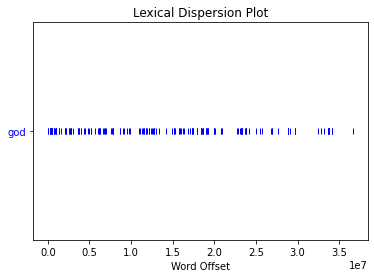

In [ ]:

#now to try some dispersion plots
nltk_text.dispersion_plot(['god']) #maybe less than we would expect

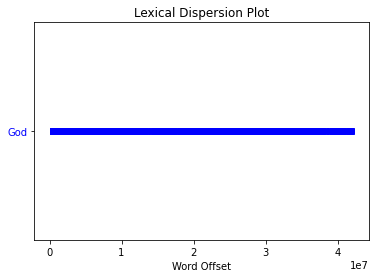

In [ ]:
nltk_text.dispersion_plot(['God']) #it's case sensitive, because I am looking at original text, not tokenized words (which I have made all lower case)
#that looks more like what I would expect!

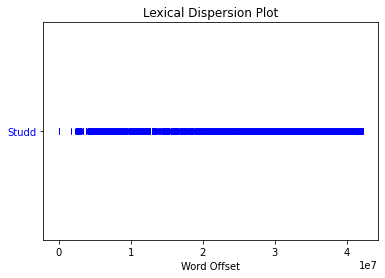

In [ ]:
#let's try some names
nltk_text.dispersion_plot(['Studd'])

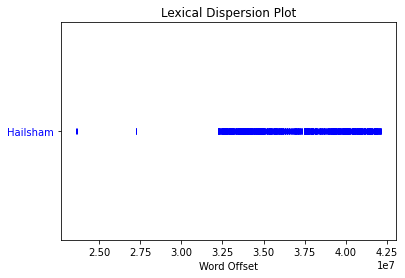

In [ ]:
nltk_text.dispersion_plot(['Hailsham'])#this looks accuracte, because Lord Hailsham only became involved in the Poly later

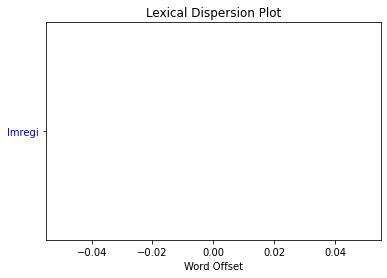

In [ ]:
nltk_text.dispersion_plot(['Imregi'])#might be an OCR thing

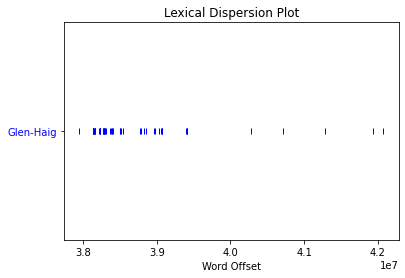

In [ ]:
nltk_text.dispersion_plot(['Glen-Haig'])#bit odd, I would have thought references to (Mary) Glen-Haig would be later in the corpus [she competed in the 1948, 52, 56 and 60 Olympics]
#actually, look at the scale it seems to start with the first reference. Would be better, if we were looking at it across time, to show the whole scale

In [ ]:
nltk_text.concordance('Glen-Haig')#these look accurate though

Displaying 25 of 54 matches:
ing the splendid lead set by Mrs , Glen-Haig of the Poly Ladies ’ Club in winni
ould all like to congratulate Mrs. Glen-Haig upon winning the Ladies ’ Junior F
onald Bailey ( Harriers ) and Mrs. Glen-Haig ( Fencing ) were the worthy recipi
 the Baptiste Bertrand Cup to Mary Glen-Haig on October 12th . Mrs. Spong , her
n held in the Poly building . Mary Glen-Haig was outstanding from the commencem
uncil Dinner on October23rd , Mary Glen-Haig was presented by Mrs. Vincent Hoar
et ballot had to be taken and Mrs. Glen-Haig , of the Fencing Club , was awarde
atulate the ladies ’ club and Mrs. Glen-Haig on their recent success in a senio
 were three Poly ladies , and Mrs. Glen-Haig was declared the victor of the com
nce more , congratulations to Mary Glen-Haig on adding to her laurels , and to 
a vigilant team of spotters . Mrs. Glen-Haig conceded only one fight : her scor
competitions entail . Besides Mrs. Glen-Haig two other Poly members out of the 
thnott , th

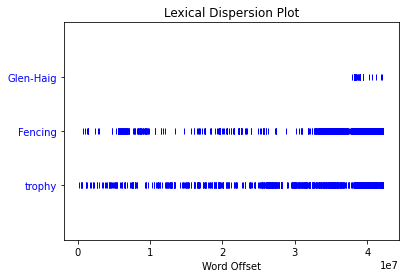

In [ ]:
#can do multiple terms
nltk_text.dispersion_plot(['Glen-Haig', 'Fencing', 'trophy'])
#this helps with the scale issue
#N.B. scale is in tens of millions (number of words from beginning)


In [ ]:
#nltk_text.similar('God')
#too slow, manually stopped after 1500s

In [26]:
df_dateindex.to_pickle("corpus_4_date.pkl")#pickle the corpus with date as index [remember one item has been removed as it had no date]

In [ ]:
#ok, going to see if I can do a google n-gram viewer type thing,
#will start a new notebook for that...